In [1]:
!pip install h5py

Lo archivos proporcionados se encuentran en formato h5. h5 es un  formato de datos jerárquico de código abierto, versión 5 (HDF5) que admite datos grandes, complejos y heterogéneos. Utiliza una estructura similar a un «directorio de archivos» que le permite organizar los datos dentro del archivo de muchas formas estructuradas diferentes organizados en grupos y datasets.
 ## Estructura intena de los archivos h5
* Grupo: un elemento similar a una carpeta dentro de un archivo HDF5 que puede contener otros grupos O conjuntos de datos dentro de él.
* Datasets: los datos reales contenidos en el archivo HDF5. Los conjuntos de datos se almacenan a menudo (pero no es necesario) dentro de grupos en el archivo.


Normalizar bandas para que queden entre cero y uno " VALORES NEGATIVOS CON ERRO"

![estructura de archivo HDF5 que contiene grupos, conjuntos de datos y metadatos asociados.](h5.png)


In [2]:
#Bibliotecas utilizadas
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Bibliotecas utilizadas para la regresión logistica

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Explorando los archivos h5

In [3]:
# Abrir el archivo en modo lectura
with h5py.File("Data/test_data.h5", "r") as archivo:
    print("Grupos disponibles:", list(archivo.keys()))
    imagenes_test= archivo["images"][:]
   



Grupos disponibles: ['images']


In [4]:
with h5py.File("Data/train_data.h5", "r") as archivo:
    print("Grupos disponibles:", list(archivo.keys()))
    etiquetas = archivo["labels"][:] # guardo las etiquetas en una variable para analizar las clases
    imagenes= archivo["images"][:]

Grupos disponibles: ['images', 'labels']


##### a. Explore the dataset to assess class distribution (0 = no settlement, 1 = settlement) and identify potential imbalance.

In [5]:
clases, conteos = np.unique(etiquetas, return_counts=True)
print(clases)
print(conteos)


[0 1]
[1000000  100000]


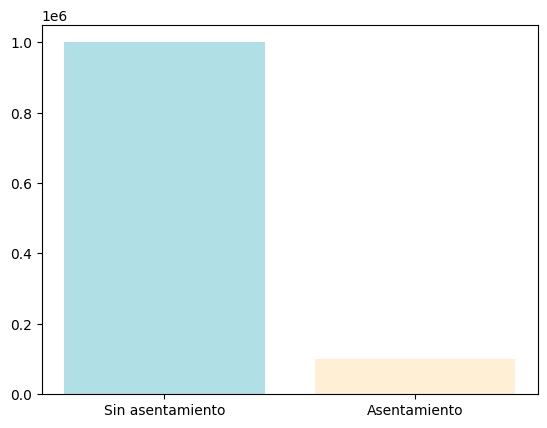

In [6]:

etiquetas_personalizadas = ["Sin asentamiento", "Asentamiento"]
colores = ['#B0E0E6', '#FFEFD5']

plt.bar(clases, conteos, color=colores)  
plt.xticks(clases, etiquetas_personalizadas)  

plt.show()

## DATOS DE ENTRENAMIENTO

##### b. Apply a balancing strategy (e.g., undersampling, oversampling, SMOTE) and justify your choice.
##### Balanceo de clases

Aplico undersampling aleatorio, es una técnica para balancear las clases eliminando muestras solo de la clase mayoritaria, la cual consiste en:

Identificar la clase mayoritaria

Elimina aleatoriamente ejemplos de esa clase hasta que quede la misma cantidad que la clase minoritaria

Deja intacta la clase minoritaria.

In [7]:
#aplano los datos vara que sea de 2d y lo pueda manipular como un dataframe 
imagenes_reshaped = imagenes.reshape(imagenes.shape[0], -1) # Tamaño(1100000, 1536)
#convierto los datos de la imagenes y las etiquetas a un dataframe
img_train = pd.DataFrame(imagenes_reshaped)
etiquetas_train = pd.DataFrame(etiquetas, columns=["etiqueta"])
#uno los datos para tener solo un set de datos 
train_join = pd.concat([img_train, etiquetas_train], axis=1)

# Filtro por clase 
clase_0 = train_join[train_join['etiqueta'] == 0]
clase_1 = train_join[train_join['etiqueta'] == 1]

print(imagenes_reshaped[:1,:])

[[677 595 524 ... 910 831 914]]


In [8]:


# Número de elementos que NO son NaN en la columna 'etiqueta'
num_etiquetados = train_join['etiqueta'].notna().sum()

print(f"Número de elementos con etiqueta: {num_etiquetados}")


Número de elementos con etiqueta: 1100000


In [9]:
n_clase_0= len(clase_0)
print(n_clase_0)
n_clase_1= len(clase_1)
print(n_clase_1)
#obten la clase con el minimo 
clases=int(min(n_clase_0, n_clase_1))

1000000
100000


In [10]:
#submuestrar aleatoriamente cada clase 
clase_0_sub = clase_0.sample(n=clases, random_state=112)
clase_1_sub = clase_1.sample(n=clases, random_state=112)

resampled = pd.concat([clase_0_sub, clase_1_sub])

#separar las categorias 
img_train_resampled = resampled.drop(columns='etiqueta')
etiquetas_train_resampled = resampled['etiqueta'] 

clase2, conteo2 = np.unique(etiquetas_train_resampled, return_counts=True)

In [11]:
print(clases)
print(conteos)

100000
[1000000  100000]


In [12]:
print(img_train_resampled.head())



# Número de elementos que NO son NaN en la columna 'etiqueta'
num_etiquetados = resampled['etiqueta'].notna().sum()

print(f"Número de elementos con etiqueta: {num_etiquetados}")

         0     1     2     3     4     5     6     7     8     9     ...  \
768105    560   554   554   640   614   613   648   558   457   411  ...   
718586    298   341   383   365   403   409   492   561   675   643  ...   
329795   1123  1305  1334  1327  1318  1247   997  1016  1145  1103  ...   
1062221   525   659   806   867   802   649   576   544   601   790  ...   
115979    827   820   811   833   884   810   677   646   707   665  ...   

         1526  1527  1528  1529  1530  1531  1532  1533  1534  1535  
768105   1266  1273  1562  1311  1066  1164  1343  1327  1142   950  
718586   1341  1184  1260  1209  1086  1209  1238  1243  1263  1234  
329795   2861  2946  3007  3008  3264  3086  2799  3047  3228  3190  
1062221  2039  2131  2030  1631  1729  1894  1793  1700  1651  1624  
115979   2577  2609  2567  2534  2503  2451  2436  2304  2069  2041  

[5 rows x 1536 columns]
Número de elementos con etiqueta: 200000


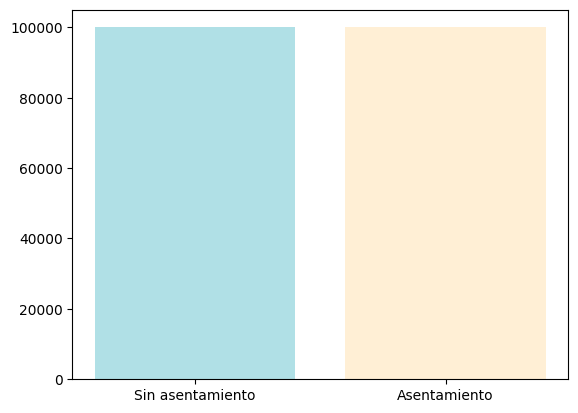

In [13]:

etiquetas_personalizadas = ["Sin asentamiento", "Asentamiento"]
colores = ['#B0E0E6', '#FFEFD5']

plt.bar(clase2, conteo2, color=colores)  
plt.xticks(clase2, etiquetas_personalizadas)  

plt.show()

#### c. Extract relevant features from the data, either statistical or spectral.

In [14]:
import numpy as np
import pandas as pd

# ==== Funciones ====
def kurtosis(x):
    x = np.atleast_1d(x)  
    n = len(x)
    media = np.mean(x)
    std = np.std(x)
    if std == 0:
        return 0
    m4 = np.sum((x - media)**4) / n
    return m4 / (std**4) - 3

def energia(x):
    return np.sum(x ** 2)

def entropia(x, bins=256):
    hist, _ = np.histogram(x, bins=bins, density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

def dispersion(x):
    media = np.mean(x)
    std = np.std(x)
    return std / media if media != 0 else 0

# ==== Variables ====
n_bandas = 6
n_pixeles_por_banda = 256
columnas_pixeles = img_train_resampled.columns[:-1]  # todas menos etiqueta

features_list = []

# ==== Iterar sobre imágenes ====
for _, row in resampled.iterrows():
    etiqueta = row['etiqueta']
    pixeles = row[columnas_pixeles].values
    features = {}

    for b in range(n_bandas):
        start = b * n_pixeles_por_banda
        end = (b + 1) * n_pixeles_por_banda
        banda_data = pixeles[start:end]

        # Estadísticas en el dominio espacial
        features[f'banda{b+1}_mean'] = np.mean(banda_data)
        features[f'banda{b+1}_std'] = np.std(banda_data)
        features[f'banda{b+1}_kurtosis'] = kurtosis(banda_data)
        features[f'banda{b+1}_energia'] = energia(banda_data)
        features[f'banda{b+1}_entropia'] = entropia(banda_data)
        features[f'banda{b+1}_dispersion'] = dispersion(banda_data)

        # FFT
        fft_vals = np.abs(np.fft.fft(banda_data))
        features[f'banda{b+1}_fft_mean'] = np.mean(fft_vals)
        features[f'banda{b+1}_fft_std'] = np.std(fft_vals)
        features[f'banda{b+1}_fft_max'] = np.max(fft_vals)
        features[f'banda{b+1}_fft_min'] = np.min(fft_vals)
        features[f'banda{b+1}_fft_median'] = np.median(fft_vals)
        features[f'banda{b+1}_fft_kurtosis'] = kurtosis(fft_vals)
        features[f'banda{b+1}_fft_energia'] = energia(fft_vals)
        features[f'banda{b+1}_fft_entropia'] = entropia(fft_vals)
        features[f'banda{b+1}_fft_dispersion'] = dispersion(fft_vals)

    # Etiqueta
    features['etiqueta'] = etiqueta
    features_list.append(features)

# ==== DataFrame final ====
features_df = pd.DataFrame(features_list)


### Revisión


In [15]:
print(features_df.shape) # son 15 x 6 caracteristicas  = 90 + etiqueta

print(imagenes_reshaped.shape)
features_df['etiqueta'].unique()        # Valores únicos
features_df['etiqueta'].value_counts()  # Frecuencia de cada etiqueta
features_df.head()



(200000, 91)
(1100000, 1536)


,banda1_mean,banda1_std,banda1_kurtosis,banda1_energia,banda1_entropia,banda1_dispersion,banda1_fft_mean,banda1_fft_std,banda1_fft_max,banda1_fft_min,...,banda6_fft_mean,banda6_fft_std,banda6_fft_max,banda6_fft_min,banda6_fft_median,banda6_fft_kurtosis,banda6_fft_energia,banda6_fft_entropia,banda6_fft_dispersion,etiqueta
0,481.265625,130.321686,-0.754820,63641688,3.710572,0.270790,1604.306732,7814.594546,123204.0,27.711783,...,6223.557338,26827.531252,417267.0,230.128225,2377.349481,213.272378,1.934045e+11,0.008102,4.310643,0
1,306.371094,87.888818,3.282672,26006449,3.965060,0.286870,1057.366679,4988.829994,78431.0,57.680451,...,4238.953841,16441.064270,251482.0,170.869254,1429.557718,197.798960,7.351072e+10,0.012934,3.878566,0
2,1118.789062,108.604835,0.066239,323451898,3.318374,0.097074,2249.188954,17843.571589,286410.0,25.652707,...,5886.706604,46320.170157,742396.0,98.825155,1922.677995,247.664264,5.559539e+11,0.004485,7.868605,0
3,734.253906,123.163073,-0.803804,141900273,3.767665,0.167739,1914.266521,11757.374566,187969.0,81.476616,...,4986.231795,31261.434652,498714.0,124.444388,1597.185622,240.994251,2.555457e+11,0.006599,6.269551,0
4,724.414062,55.045156,0.380999,135118260,5.223286,0.075986,1288.427640,11552.411619,185450.0,7.056706,...,5092.035367,38803.152073,621275.0,28.519858,1401.496572,246.362476,3.905614e+11,0.005261,7.620362,0


etiqueta                 1.000000
banda6_fft_median        0.311769
banda5_fft_median        0.295845
banda4_fft_mean          0.246397
banda6_std               0.242955
banda4_fft_median        0.232274
banda5_fft_mean          0.230883
banda1_fft_kurtosis     -0.234676
banda3_fft_kurtosis     -0.240056
banda4_fft_dispersion   -0.249255
banda5_entropia         -0.276896
banda4_entropia         -0.292492
banda6_entropia         -0.302690
banda3_entropia         -0.319068
banda5_fft_dispersion   -0.322436
banda2_entropia         -0.352808
banda6_fft_dispersion   -0.374924
banda1_entropia         -0.387411
banda3_fft_dispersion   -0.399736
banda2_fft_dispersion   -0.421176
banda1_fft_dispersion   -0.439298
Name: etiqueta, dtype: float64


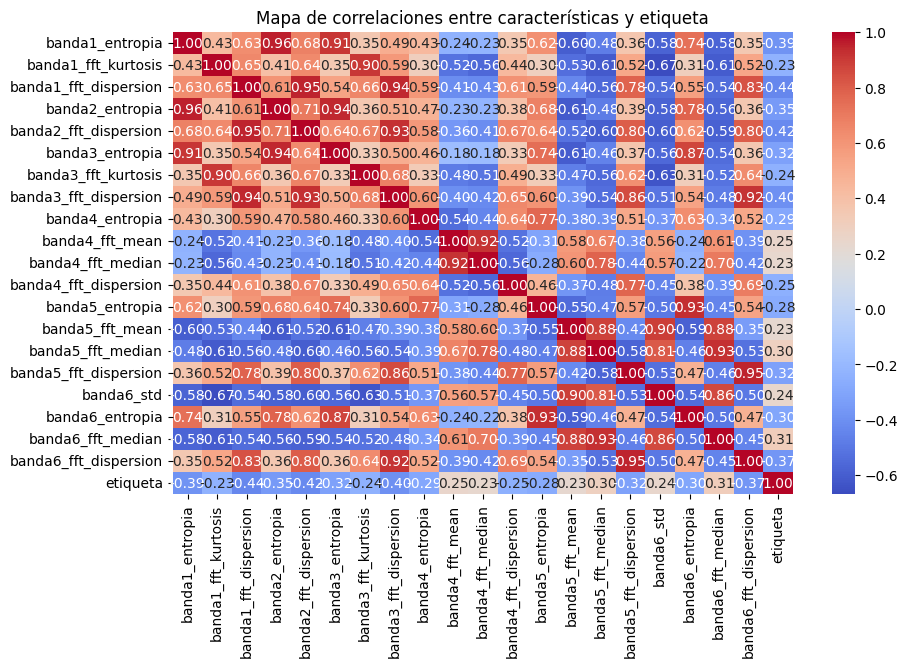

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas con las características seleccionadas + la etiqueta
selected_features = ['banda1_entropia', 'banda1_fft_kurtosis', 'banda1_fft_dispersion',
                     'banda2_entropia', 'banda2_fft_dispersion', 'banda3_entropia',
                     'banda3_fft_kurtosis', 'banda3_fft_dispersion', 'banda4_entropia',
                     'banda4_fft_mean', 'banda4_fft_median', 'banda4_fft_dispersion',
                     'banda5_entropia', 'banda5_fft_mean', 'banda5_fft_median', 'banda5_fft_dispersion',
                     'banda6_std', 'banda6_entropia', 'banda6_fft_median', 'banda6_fft_dispersion']

# Extraemos sólo esas columnas del dataset
df_sel = features_df[selected_features + ['etiqueta']]

# Calcular correlación
correlations = df_sel.corr()['etiqueta'].sort_values(ascending=False)

print(correlations)

# Visualizar con heatmap para mejor comprensión
plt.figure(figsize=(10,6))
sns.heatmap(df_sel.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de correlaciones entre características y etiqueta')
plt.show()


## Datos de prueba 

In [17]:
#aplano los datos vara que sea de 2d y lo pueda manipular como un dataframe 
imagenes_reshaped_test = imagenes_test.reshape(imagenes_test.shape[0], -1) # Tamaño(1100000, 1536)
#convierto los datos de la imagenes y las etiquetas a un dataframe
img_test= pd.DataFrame(imagenes_reshaped_test)

In [ ]:


# ==== Variables ====
n_bandas = 6
n_pixeles_por_banda = 256
columnas_pixeles = img_test.columns.tolist()


features_list_test = []

# ==== Iterar sobre imágenes ====
for _, row in img_test.iterrows():
    
    pixeles = row[columnas_pixeles].values
    features = {}

    for b in range(n_bandas):
        start = b * n_pixeles_por_banda
        end = (b + 1) * n_pixeles_por_banda
        banda_data = pixeles[start:end]

        # Estadísticas en el dominio espacial
        features[f'banda{b+1}_mean'] = np.mean(banda_data)
        features[f'banda{b+1}_std'] = np.std(banda_data)
        features[f'banda{b+1}_kurtosis'] = kurtosis(banda_data)
        features[f'banda{b+1}_energia'] = energia(banda_data)
        features[f'banda{b+1}_entropia'] = entropia(banda_data)
        features[f'banda{b+1}_dispersion'] = dispersion(banda_data)

        # FFT
        fft_vals = np.abs(np.fft.fft(banda_data))
        features[f'banda{b+1}_fft_mean'] = np.mean(fft_vals)
        features[f'banda{b+1}_fft_std'] = np.std(fft_vals)
        features[f'banda{b+1}_fft_max'] = np.max(fft_vals)
        features[f'banda{b+1}_fft_min'] = np.min(fft_vals)
        features[f'banda{b+1}_fft_median'] = np.median(fft_vals)
        features[f'banda{b+1}_fft_kurtosis'] = kurtosis(fft_vals)
        features[f'banda{b+1}_fft_energia'] = energia(fft_vals)
        features[f'banda{b+1}_fft_entropia'] = entropia(fft_vals)
        features[f'banda{b+1}_fft_dispersion'] = dispersion(fft_vals)

    features_list_test.append(features)

   
# ==== DataFrame final ====
features_df_test = pd.DataFrame(features_list_test)


In [ ]:

features_df_test.head()

##Set de datos final 
df_test = pd.concat([fft_df_test, features_df_test], axis=1)
print(df_test.shape) 


#### d. Train a traditional machine learning model (e.g., Random Forest, SVM, Logistic Regression, etc.)


#regresion logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Separar variables (X) y etiquetas (y) del set features_df
X_train = features_df.drop(columns='etiqueta')
y_train = features_df['etiqueta']



# 2. Dividir el set train en entrenamiento y validación (ejemplo 80%-20%)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 3. Crear y entrenar modelo en el subset de entrenamiento
model = LogisticRegression(max_iter=1000)
model.fit(X_tr, y_tr)

# 4. Evaluar modelo en el subset de validación
y_val_pred = model.predict(X_val)
print("Accuracy validación:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# 5. (Opcional) Entrenar con todo el set de entrenamiento (features_df completo)
model.fit(X_train, y_train)

# 6. Predecir etiquetas del set de test (features_df_test, sin etiqueta)
y_test_pred = model.predict(features_df_test)

# 7. (Opcional) mostrar predicciones
print("Predicciones en test:", y_test_pred)


In [ ]:
#Normalizando

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# 1. Separar variables (X) y etiquetas (y)
X = features_df.drop(columns='etiqueta')
y = features_df['etiqueta']

# 2. Dividir en entrenamiento y validación
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Definir pipeline: escalado + regresión logística
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# 4. Entrenar el pipeline
log_reg_pipeline.fit(X_tr, y_tr)

# 5. Evaluar en validación
y_val_pred = log_reg_pipeline.predict(X_val)
print("Accuracy validación:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# 6. (Opcional) Reentrenar con todo el set de entrenamiento
log_reg_pipeline.fit(X, y)

# 7. Predecir etiquetas del set de test (ya escalado dentro del pipeline)
y_test_pred = log_reg_pipeline.predict(features_df_test)

print("Predicciones en test:", y_test_pred)


In [ ]:
import h5py
import matplotlib.pyplot as plt

with h5py.File("Data/train_data.h5", "r") as archivo:
    print("Grupos disponibles:", list(archivo.keys()))  # Lista las claves principales
    
    # "images" es directamente un Dataset
    dataset = archivo["images"][:]  # Lo cargamos como array de numpy

print("Shape del dataset:", dataset.shape)

fig, axes = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    axes[i].imshow(dataset[0, :, :, i], cmap="gray")
    axes[i].set_title(f"Banda {i}")
    axes[i].axis("off")
plt.show()



#random forest

In [ ]:
# === Asegurar splits: X_train, X_valid, y_train, y_valid ===
from sklearn.model_selection import train_test_split
import gc

def ensure_train_valid(globs):
    """
    Crea X_valid, y_valid si no existen, usando lo que ya tengas:
    - Caso A: Ya tienes X, y  -> split 80/20.
    - Caso B: Tienes X_train, y_train pero no valid -> saca 20% de valid del train.
    - Caso C: Tienes X_train, X_test, y_train, y_test -> usa test como valid (solo si es para evaluación intermedia).
    Lanza error si no encuentra nada útil.
    """
    # Ya definidos?
    if 'X_valid' in globs and 'y_valid' in globs:
        print("✔ X_valid / y_valid ya existen.")
        return globs['X_valid'], globs['y_valid']

    # Caso A: X, y globales
    if 'X' in globs and 'y' in globs:
        print("→ Creando valid desde X, y (80/20, estratificado).")
        X_train, X_valid, y_train, y_valid = train_test_split(
            globs['X'], globs['y'],
            test_size=0.2, random_state=42,
            stratify=globs['y'] if hasattr(globs['y'], '__len__') else None
        )
        globs['X_train'], globs['X_valid'], globs['y_train'], globs['y_valid'] = X_train, X_valid, y_train, y_valid
        gc.collect()
        return X_valid, y_valid

    # Caso B: Solo tienes X_train, y_train
    if 'X_train' in globs and 'y_train' in globs and ('X_valid' not in globs or 'y_valid' not in globs):
        print("→ Particionando X_train/y_train en train(80%) y valid(20%).")
        Xtr, Xva, ytr, yva = train_test_split(
            globs['X_train'], globs['y_train'],
            test_size=0.2, random_state=42,
            stratify=globs['y_train'] if hasattr(globs['y_train'], '__len__') else None
        )
        globs['X_train'], globs['X_valid'], globs['y_train'], globs['y_valid'] = Xtr, Xva, ytr, yva
        gc.collect()
        return Xva, yva

    # Caso C: Usa test como valid (útil si ya tienes split oficial y es para comparar modelos)
    if all(k in globs for k in ['X_train', 'y_train', 'X_test', 'y_test']):
        print("⚠ Usando X_test/y_test como valid (solo para validación intermedia).")
        globs['X_valid'], globs['y_valid'] = globs['X_test'], globs['y_test']
        return globs['X_valid'], globs['y_valid']

    raise RuntimeError(
        "No encontré variables suficientes. Define al menos (X,y) o (X_train,y_train) "
        "o (X_train,y_train,X_test,y_test)."
    )

# Ejecuta la función
X_valid, y_valid = ensure_train_valid(globals())
print("Listo: X_valid.shape =", getattr(X_valid, "shape", "desconocido"))


In [ ]:
# ================================
# Random Forest Classifier
# ================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

# Entrenamos el modelo
rf_model = RandomForestClassifier(
    n_estimators=100,      # número de árboles
    max_depth=None,        # sin límite de profundidad
    random_state=42,
    n_jobs=-1,             # usa todos los núcleos disponibles
    class_weight="balanced"  # importante si existe desbalanceo
)

print("Entrenando modelo Random Forest...")
rf_model.fit(X_train, y_train)

# Predicciones en validación
y_pred = rf_model.predict(X_valid)

# Evaluamos el modelo
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print("\nResultados Random Forest:")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_valid, y_pred))


#random forest

## Sin usar balanceo 

In [ ]:

# ==== Variables ====
n_bandas = 6
n_pixeles_por_banda = 256
columnas_pixeles = train_join.columns[:-1]  # todas menos etiqueta

features_list = []

# ==== Iterar sobre imágenes ====
for _, row in train_join.iterrows():
    etiqueta = row['etiqueta']
    pixeles = row[columnas_pixeles].values
    features = {}

    for b in range(n_bandas):
        start = b * n_pixeles_por_banda
        end = (b + 1) * n_pixeles_por_banda
        banda_data = pixeles[start:end]

        # Estadísticas en el dominio espacial
        features[f'banda{b+1}_mean'] = np.mean(banda_data)
        features[f'banda{b+1}_std'] = np.std(banda_data)
        features[f'banda{b+1}_kurtosis'] = kurtosis(banda_data)
        features[f'banda{b+1}_energia'] = energia(banda_data)
        features[f'banda{b+1}_entropia'] = entropia(banda_data)
        features[f'banda{b+1}_dispersion'] = dispersion(banda_data)

        # FFT
        fft_vals = np.abs(np.fft.fft(banda_data))
        features[f'banda{b+1}_fft_mean'] = np.mean(fft_vals)
        features[f'banda{b+1}_fft_std'] = np.std(fft_vals)
        features[f'banda{b+1}_fft_max'] = np.max(fft_vals)
        features[f'banda{b+1}_fft_min'] = np.min(fft_vals)
        features[f'banda{b+1}_fft_median'] = np.median(fft_vals)
        features[f'banda{b+1}_fft_kurtosis'] = kurtosis(fft_vals)
        features[f'banda{b+1}_fft_energia'] = energia(fft_vals)
        features[f'banda{b+1}_fft_entropia'] = entropia(fft_vals)
        features[f'banda{b+1}_fft_dispersion'] = dispersion(fft_vals)

    # Etiqueta
    features['etiqueta'] = etiqueta
    features_list.append(features)

# ==== DataFrame final ====
features_org = pd.DataFrame(features_list)


In [ ]:
print(features_org.shape)
print(train_join.shape)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_curve

# ============================
# 1. Preparar datos de entrenamiento
# ============================

columnas_pixeles = train_join.columns[:-1]  # Todas menos la etiqueta
X = train_join[columnas_pixeles].values
y = train_join['etiqueta'].values

# Dividir train en sub-train y validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Tamaño Train:", X_train.shape)
print("Tamaño Validación:", X_val.shape)
print("Distribución de clases en Train:", np.bincount(y_train))
print("Distribución de clases en Validación:", np.bincount(y_val))

# ============================
# 2. Entrenar modelo con class_weight='balanced'
# ============================
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear', 
    random_state=42
)

log_reg.fit(X_train, y_train)

# ============================
# 3. Evaluar en validación
# ============================
y_val_pred = log_reg.predict(X_val)
y_val_probs = log_reg.predict_proba(X_val)[:, 1]  # Probabilidades de clase positiva

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_val, y_val_pred, digits=4))

print("\n--- Matriz de Confusión ---")
print(confusion_matrix(y_val, y_val_pred))

print("\nROC-AUC:", roc_auc_score(y_val, y_val_probs))
print("PR-AUC:", average_precision_score(y_val, y_val_probs))

# ============================
# 4. Ajustar umbral de clasificación
# ============================
prec, rec, thresholds = precision_recall_curve(y_val, y_val_probs)
# Ejemplo: elegir umbral con mejor equilibrio precisión/recobrado
f1_scores = 2 * (prec * rec) / (prec + rec)
best_threshold = thresholds[np.nanargmax(f1_scores)]
print(f"\nMejor umbral según F1: {best_threshold:.3f}")

# ============================
# 5. Predicción en features_df_test
# ============================
# features_df_test debe tener las mismas columnas que train_join sin la etiqueta
X_test_final = features_df_test[columnas_pixeles].values
y_test_pred = (log_reg.predict_proba(X_test_final)[:, 1] >= best_threshold).astype(int)

print("\nPredicciones finales para test:")
print(y_test_pred[:20])  # muestra primeras 20


##Referencias
https://soloelectronicos.com/2021/12/09/como-crear-un-dataset-en-el-formato-h5/